### Importación de librerías

In [1]:
#librerías de manejo de datos
import numpy as np
import pandas as pd

#librerías de visualización de datos
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#reescribo el nombre de las columnas para poder acceder a ellas más fácilmente
name_cols = {'Unnamed': 'unnamed',
        'id': 'id',
        'Gender': 'gender',
        'Customer Type': 'customer_type',
        'Age': 'age',
        'Type of Travel': 'type_travel',
        'Class': 'class',
        'Flight Distance': 'flight_distance',
        'Inflight wifi service': 'wifi_service',
        'Departure/Arrival time convenient': 'departure_arrival_time',
        'Ease of Online booking': 'online_booking',
        'Gate location': 'gate_location',
        'Food and drink': 'food_drink',
        'Online boarding': 'online_boarding',
        'Seat comfort': 'seat_comfort',
        'Inflight entertainment': 'entertain',
        'On-board service': 'onboard_service',
        'Leg room service': 'leg_service',
        'Baggage handling': 'bag_handle',
        'Checkin service': 'checkin_service',
        'Inflight service': 'inflight_service',
        'Cleanliness': 'cleanliness',
        'Departure Delay in Minutes': 'departure_delay',
        'Arrival Delay in Minutes': 'arrival_delay',
        'satisfaction': 'satisfaction'}

#formato lista para poder pasarlas como parámetro names
name_cols = list(name_cols.values())

#creación del dataframe
df = pd.read_csv('airline_passenger_satisfaction.csv', header = 0, names = name_cols)

/shared-libs/python3.9/py-core/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3139: DtypeWarning: Columns (1,4,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


ValueError: Need to specify at least one of 'labels', 'index' or 'columns'

### Exploración básica inicial

In [3]:
df.head()

,unnamed,id,gender,customer_type,age,type_travel,class,flight_distance,wifi_service,departure_arrival_time,...,entertain,onboard_service,leg_service,bag_handle,checkin_service,inflight_service,cleanliness,departure_delay,arrival_delay,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


Parece que las columnas unnamed e id son números únicos sin información relevante.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   unnamed                 103904 non-null  int64  
 1   id                      103904 non-null  int64  
 2   gender                  103904 non-null  object 
 3   customer_type           103904 non-null  object 
 4   age                     103904 non-null  int64  
 5   type_travel             103904 non-null  object 
 6   class                   103904 non-null  object 
 7   flight_distance         103904 non-null  int64  
 8   wifi_service            103904 non-null  int64  
 9   departure_arrival_time  103904 non-null  int64  
 10  online_booking          103904 non-null  int64  
 11  gate_location           103904 non-null  int64  
 12  food_drink              103904 non-null  int64  
 13  online_boarding         103904 non-null  int64  
 14  seat_comfort        

Hay 103 904 registros/filas y 25 columnas

In [5]:
#permite eliminar los registros duplicados.
df = df.drop_duplicates()

#verificamos si cambió el dataset original.
df.shape

(103904, 25)

Confirmamos que no hay duplicados en el dataset porque la forma permanece igual después de aplicar .drop_duplicates()

In [6]:
#exploramos la cantidad de nulos
df.isnull().sum()

unnamed                     0
id                          0
gender                      0
customer_type               0
age                         0
type_travel                 0
class                       0
flight_distance             0
wifi_service                0
departure_arrival_time      0
online_booking              0
gate_location               0
food_drink                  0
online_boarding             0
seat_comfort                0
entertain                   0
onboard_service             0
leg_service                 0
bag_handle                  0
checkin_service             0
inflight_service            0
cleanliness                 0
departure_delay             0
arrival_delay             310
satisfaction                0
dtype: int64

In [7]:
(310/103904)*100

0.29835232522328303

Hay muy pocos nulos en el dataset. Solamente en la columna arrival_delay. Al ser sólo un 0.29% del total de datos, podríamos plantearnos eliminar estos registros o imputarlos de una forma muy sencilla.

### Exploración básica de la variable de salida

<AxesSubplot: xlabel='satisfaction', ylabel='Count'>

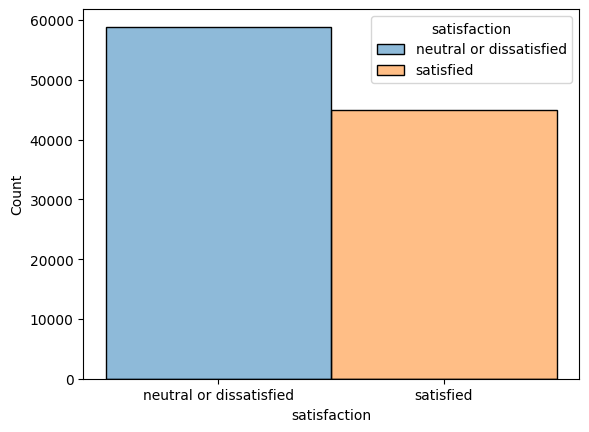

In [8]:
sns.histplot(data = df, x = 'satisfaction', hue = 'satisfaction')

Está relativamente bien balanceada. Esto es bueno.

### Preguntas de investigación

- ¿Cuántos niveles hay de las variables categóricas? ¿Están bien balanceados los niveles?

In [9]:
cat = ['gender', 'customer_type', 'type_travel', 'class']

for col in cat:
    print(f"Column name: {col}")
    print(df[col].value_counts())
    print()

Column name: gender
Female    52727
Male      51177
Name: gender, dtype: int64

Column name: customer_type
Loyal Customer       84923
disloyal Customer    18981
Name: customer_type, dtype: int64

Column name: type_travel
Business travel    71655
Personal Travel    32249
Name: type_travel, dtype: int64

Column name: class
Business    49665
Eco         46745
Eco Plus     7494
Name: class, dtype: int64



gender -> balanceada

customer_type -> un poco desbalanceada

type_travel -> un poco desbalanceada

class -> el nivel Eco Plus está desbalanceado

- ¿Cómo se comporta la variable de salida respecto a las categóricas?

Column name: gender


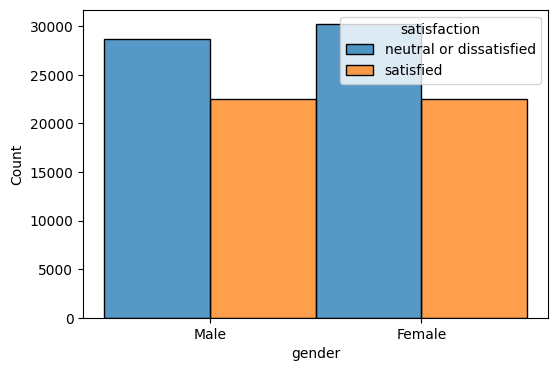


Column name: customer_type


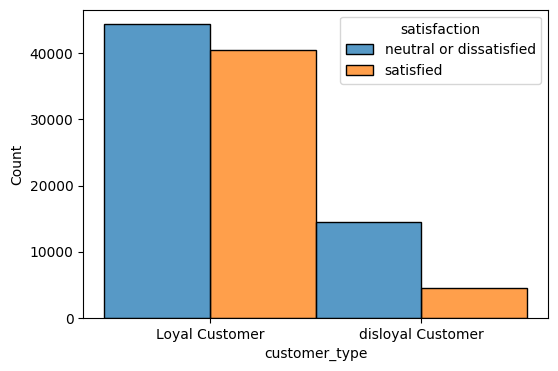


Column name: type_travel


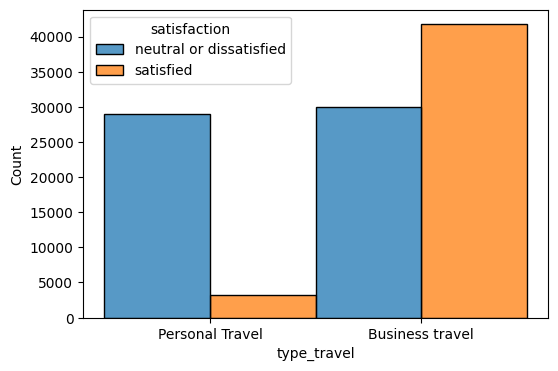


Column name: class


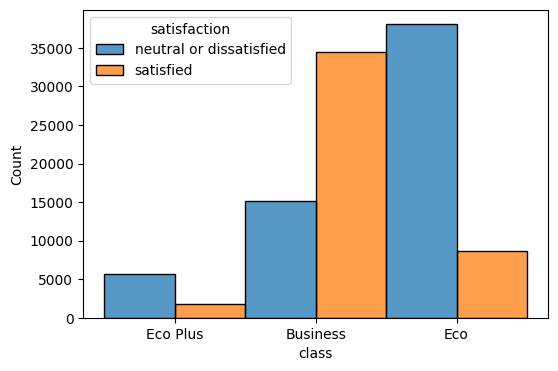

In [10]:
for col in cat:
    print(f"Column name: {col}")
    plt.figure(figsize = (6, 4))
    plt.subplot(111)
    sns.histplot(data = df, x = df[col], hue = 'satisfaction', multiple = 'dodge', binwidth = 0.5)
    plt.show()
    print()

gender -> parece que no influye en la 'satisfaction'. El comportamiento de 'satisfaction' es igual para 'male' que para 'female'

customer_type -> pareciera que los 'disloyal Customer' estuvieran más insatisfechos, aunque ¿es posible que sea porque la variable está desbalanceada?

type_travel -> se ve una clara diferencia en esta variable. Los que viajan por 'Business' parecen más satisfechos.

class -> se ve también una clara diferencia. Los de 'Business class' están más satisfechos.

¿Habrá colinealidad entre type_travel y class?

- ¿Cómo responde la variable de salida ante las variables numéricas?

In [11]:
df.describe()

,unnamed,id,age,flight_distance,wifi_service,departure_arrival_time,online_booking,gate_location,food_drink,online_boarding,seat_comfort,entertain,onboard_service,leg_service,bag_handle,checkin_service,inflight_service,cleanliness,departure_delay,arrival_delay
count,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103594.000000
mean,51951.500000,64924.210502,39.379706,1189.448375,2.729683,3.060296,2.756901,2.976883,3.202129,3.250375,3.439396,3.358158,3.382363,3.351055,3.631833,3.304290,3.640428,3.286351,14.815618,15.178678
std,29994.645522,37463.812252,15.114964,997.147281,1.327829,1.525075,1.398929,1.277621,1.329533,1.349509,1.319088,1.332991,1.288354,1.315605,1.180903,1.265396,1.175663,1.312273,38.230901,38.698682
min,0.000000,1.000000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25975.750000,32533.750000,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,51951.500000,64856.500000,40.000000,843.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,77927.250000,97368.250000,51.000000,1743.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,103903.000000,129880.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


Parece que hay algunas variables que son calificaciones que probablemente vayan de 0 a 5. Investigaremos primero estás "calificaciones" y después miraremos las demás variables numéricas.

In [12]:
numeric_calif = ['wifi_service', 'departure_arrival_time', 'online_booking', 'gate_location', 'food_drink', 
        'online_boarding', 'seat_comfort', 'entertain', 'onboard_service', 'leg_service', 'bag_handle',
        'checkin_service', 'inflight_service', 'cleanliness']

numeric_notcalif = ['age', 'flight_distance', 'departure_delay', 'arrival_delay']

Column name: wifi_service


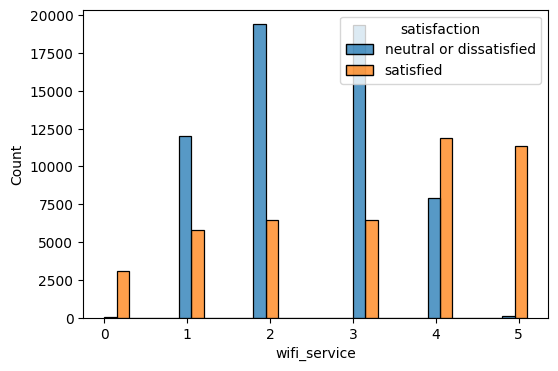


Column name: departure_arrival_time


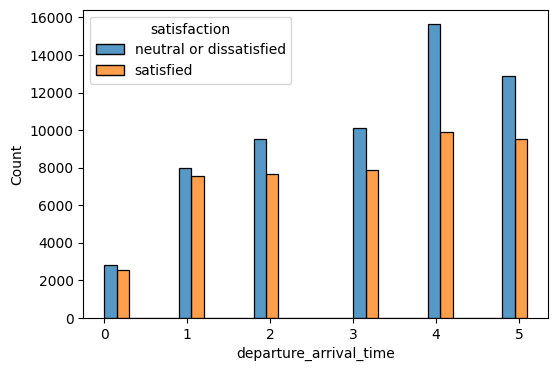


Column name: online_booking


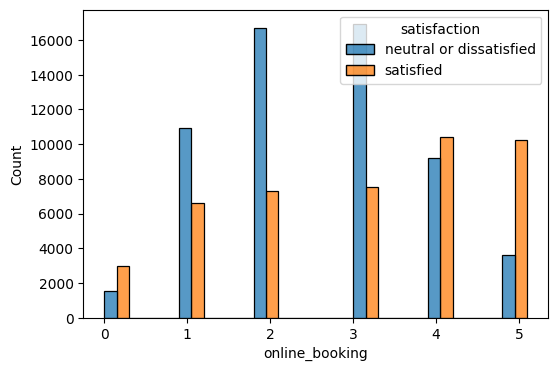


Column name: gate_location


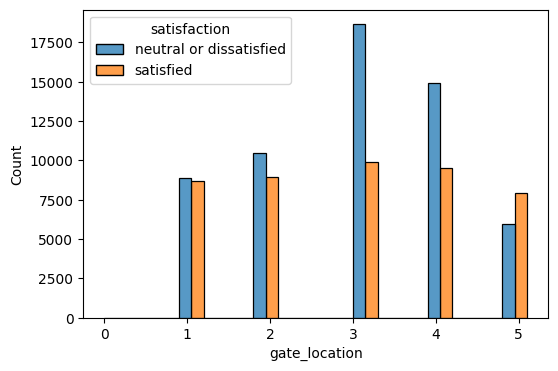


Column name: food_drink


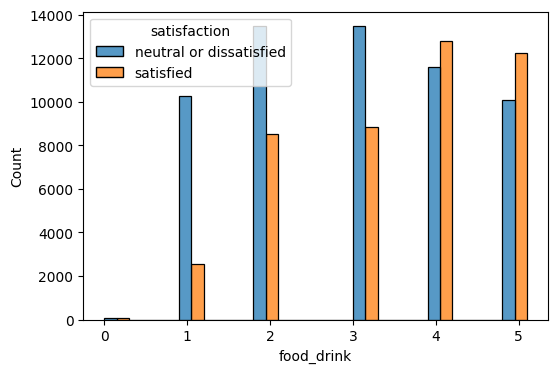


Column name: online_boarding


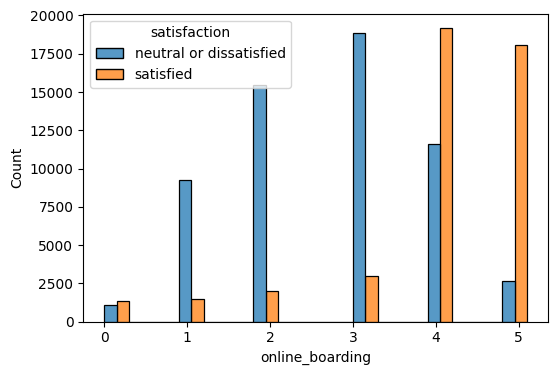


Column name: seat_comfort


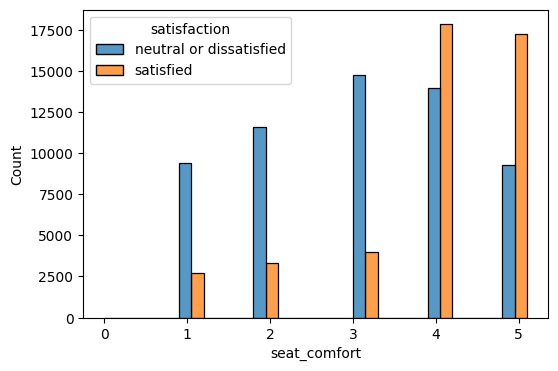


Column name: entertain


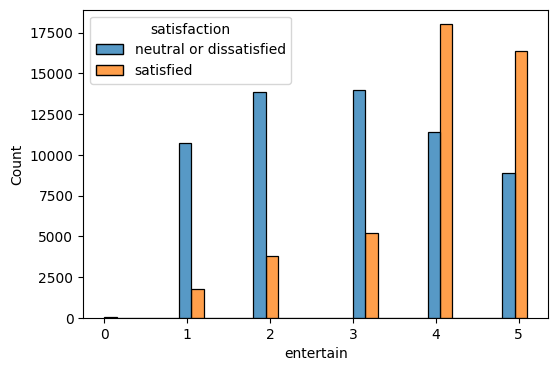


Column name: onboard_service


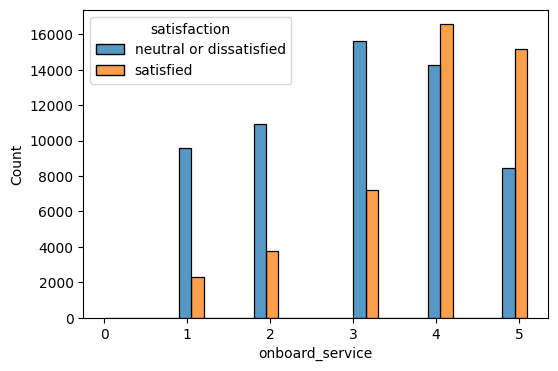


Column name: leg_service


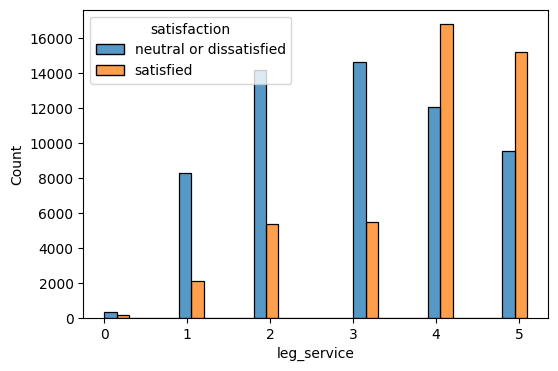


Column name: bag_handle


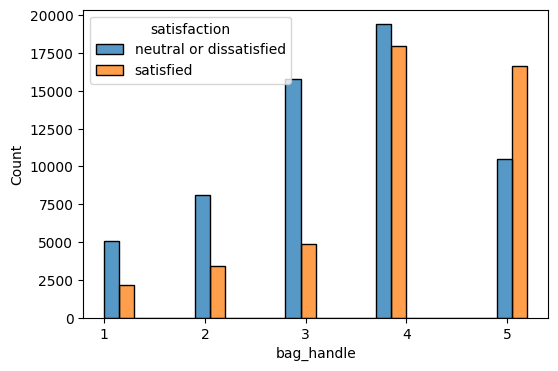


Column name: checkin_service


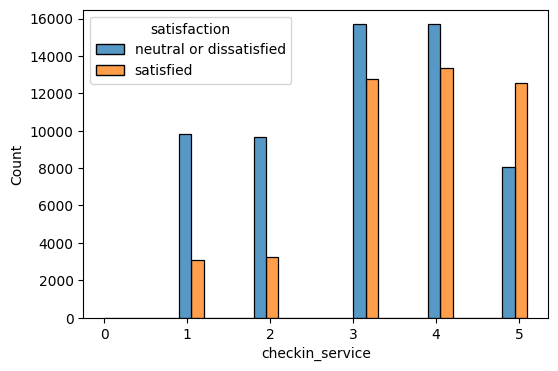


Column name: inflight_service


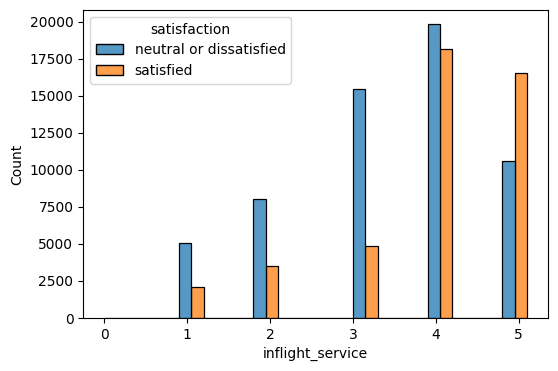


Column name: cleanliness


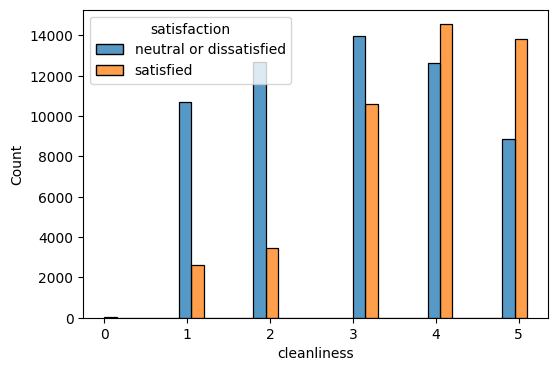

In [13]:
for col in numeric_calif:
    print(f"Column name: {col}")
    plt.figure(figsize = (6, 4))
    plt.subplot(111)
    sns.histplot(data = df, x = df[col], hue = 'satisfaction', multiple = 'dodge', binwidth = 0.3)
    plt.show()
    print()

Se podría "esperar" (simplificando mucho la realidad) que las barras de satisfacción fueran aumentando con la calificación (barras de satisfacción más altas en 4 - 5) y que las barras de instatisfacción fueran disminuyendo a medida que aumenta la calificación...Sin embargo, miremos más de cerca lo que puede estar pasando en cada una:

'wifi_service' -> 

'departure_arrival_time' ->

'online_booking' ->

'gate_location' ->

'food_drink' ->

'online_boarding' ->

'seat_comfort' ->

'entertain' ->

'onboard_service' ->

'leg_service' ->

'bag_handle' ->

 'checkin_service' ->

'inflight_service' ->

'cleanliness' ->

mirar la colinealidad de todas

hacer algun promedio o suma de algunas calificaciones que tengan mucha colinealidad o separarlas por catgorías y sumarlas/promediar

las notcalif explorarlas y hacerlas categóricas (probar)

### Imputación de nulos

### Verificación de multicolinealidad: heatmap

### Ingeniería de características

### Transformer (CustomTransformer)

### Numéricas: MinMaxScaler / Categóricas: OneHotEncoding

### Separación de X - y

### Ajuste de hiperparámetros

### Validación cruzada

### Modelo IA con todo el conjunto de datos disponibles

### Gráfica: características más importantes

### LLUVIA DE IDEAS PREGUNTAS DE INVESTIGACIÓN

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=29b03316-cf38-4365-8907-31706818d5ee' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>